# First (single) level analysis - Part 1

First level models are, in essence, linear regression models run at the level of a single run or single subject. The model is applied on a voxel-wise basis, either on the whole brain or within a region of interest. The timecourse of each voxel is regressed against a predicted BOLD response created by convolving the haemodynamic response function (HRF) with a set of predictors defined within the design matrix.

In NiLearn we use them as follows:

Due to jupyter notebook limitations we have to create a function to run a previous notebook in the background to use its output here in the analysis pipeline:

In [7]:
%%capture

import io
import nbformat

def execute_notebook(nbfile):
    with io.open(nbfile, encoding="utf8") as f:
        nb = nbformat.read(f, as_version=4)

    ip = get_ipython()

    for cell in nb.cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.source)

execute_notebook('2_Dataset.ipynb')

## Specifiying the model:

First, we have to specify the model. NiLearn offers a few ways to do this for multiple ways of formatting the dataset. How to use it for your dataset specifically can be read in the NiLearn documentation under 'User guide' -> 'First level models'.

In our case, as we used that method to download the dataset, we follow the path outlined in the document on how to use 'First level analysis of a complete BIDS dataset from openneuro'.

We have a event-based dataset, as described in the dataset description, so we have to specify the events for NiLearn to calculate the design matrix on them.

You can look at the documentation and specify more parameters past the task labels, for example space labels other than the default, a specific derivatives folder (generated by pre-processing) if you saved it somewhere else.

In [5]:
from nilearn.glm.first_level import first_level_from_bids

task_label = "languagelocalizer"
(
    models,
    models_run_imgs,
    models_events,
    models_confounds,
) = first_level_from_bids(
    data.data_dir,                     # variable with path to dataset
    task_label,
    img_filters=[("desc", "preproc")],
    n_jobs=2,
    space_label="",
    sub_labels=["01", "02", "03", "04"],  # comment to run subset of subjects
)

/var/folders/rg/gfn3fn_s15bb_bs5l1kkblsm0000gn/T/ipykernel_25664/4036119558.py:9: UserWarning: 'StartTime' not found in file /Users/sophiahaake/nilearn_data/fMRI-language-localizer-demo-dataset/derivatives/sub-01/func/sub-01_task-languagelocalizer_desc-preproc_bold.json.
  ) = first_level_from_bids(


## Fitting the model:

Then we fit the model for our subset of subjects.
After we are done we can plot the design matrix for each subject.

Subject 1: Design Matrix
     language  string      RotX      RotY      RotZ        X        Y  \
0.0  0.000000     0.0  0.049782 -0.015877  0.006005 -2.89331  7.02019   
1.5  0.000000     0.0  0.049579 -0.015300  0.005969 -2.89903  7.01277   
3.0  0.000000     0.0  0.049899 -0.015055  0.005724 -2.88839  7.03311   
4.5  0.000416     0.0  0.050209 -0.015752  0.005528 -2.88713  7.02144   
6.0  0.057955     0.0  0.049601 -0.015629  0.006192 -2.88762  7.01049   

           Z   drift_1   drift_2   drift_3   drift_4   drift_5   drift_6  \
0.0 -5.27795  0.093452  0.093445  0.093434  0.093419  0.093399  0.093375   
1.5 -5.25286  0.093434  0.093375  0.093276  0.093137  0.092960  0.092742   
3.0 -5.26949  0.093399  0.093234  0.092960  0.092576  0.092083  0.091482   
4.5 -5.27385  0.093346  0.093023  0.092486  0.091735  0.090774  0.089602   
6.0 -5.24182  0.093276  0.092742  0.091856  0.090619  0.089037  0.087116   

     constant  
0.0       1.0  
1.5       1.0  
3.0       1.0  
4.5       1.0  

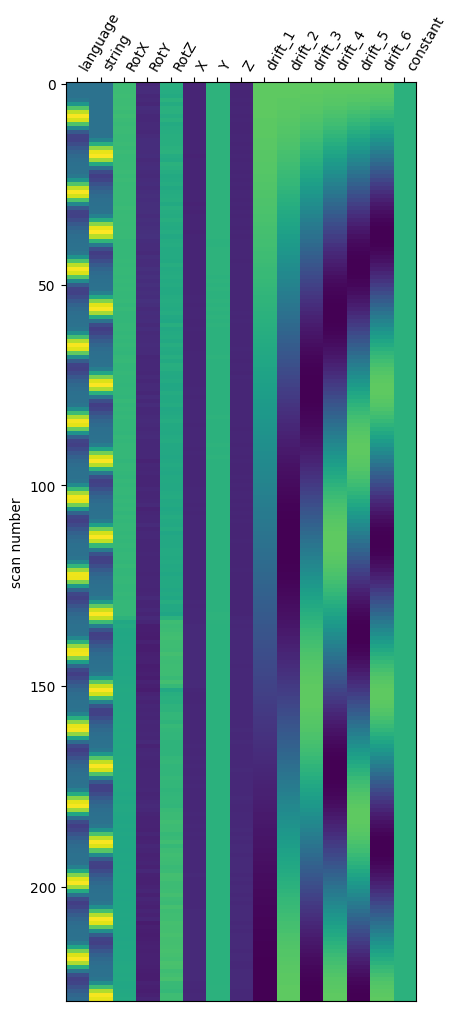

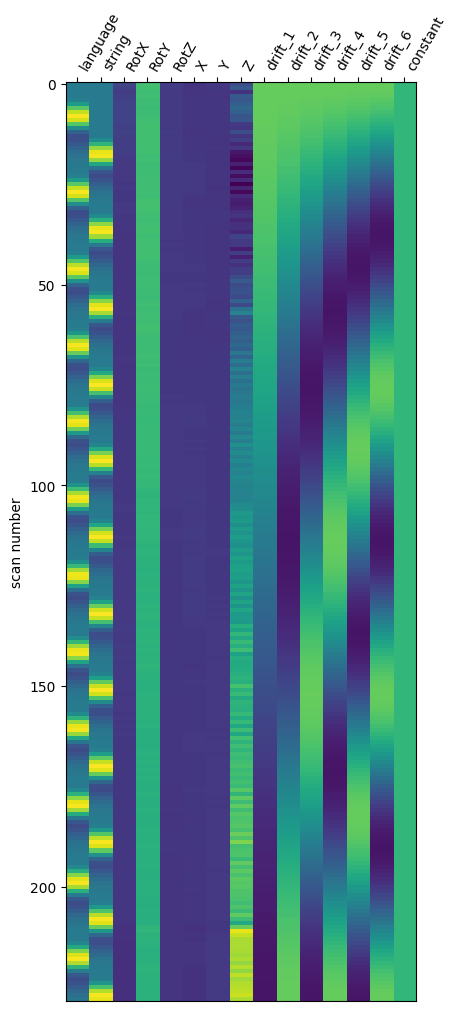

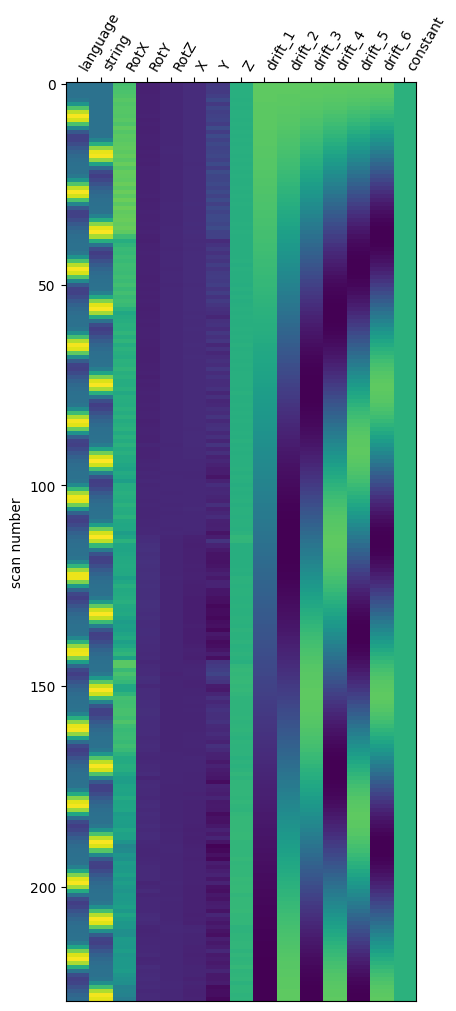

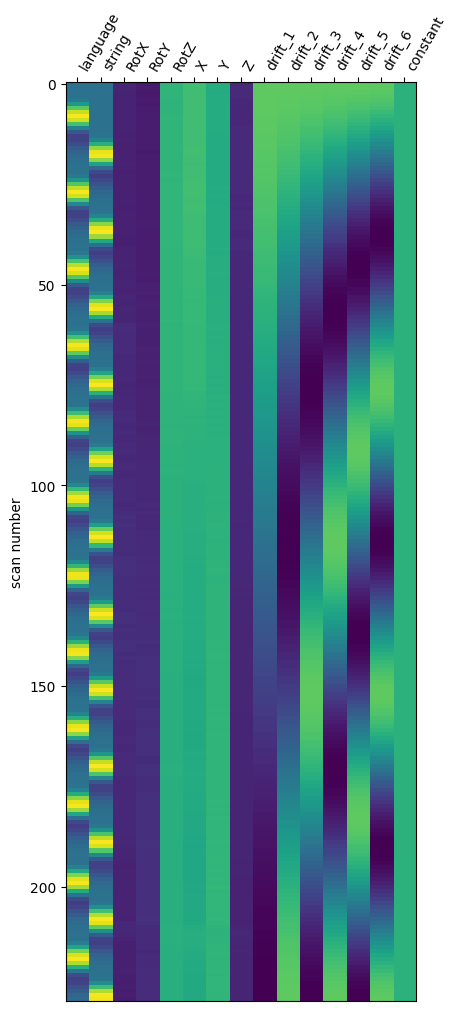

Exception ignored in: <function ResourceTracker.__del__ at 0x104405ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106849ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [6]:
from nilearn import plotting

# Assuming you have already run first_level_from_bids
for i, model in enumerate(models):
    print(enumerate(models))
    # Fit the model before accessing design_matrices_
    model.fit(models_run_imgs[i], models_events[i], models_confounds[i])

    print(f"Subject {i+1}: Design Matrix")
    design_matrix = model.design_matrices_[0]  # Design matrix of first run
    plotting.plot_design_matrix(design_matrix)
    # Display the first few rows
    print(design_matrix.head())